# Time series

In [3]:
from datetime import datetime
today = datetime(year = 2025, month = 3, day = 2)

In [4]:
today.strftime("%B %d, %Y")

'March 02, 2025'

In [5]:
today.strftime("%A")

'Sunday'

In [8]:
today.strftime("%m-%d-%Y") # month, date, year

'03-02-2025'

## Numpy datetime64

In [ ]:
import numpy as np

In [10]:
today2 = np.array('2025-03-02', dtype = np.datetime64)
today2

array('2025-03-02', dtype='datetime64[D]')

In [11]:
# some operations
today2 + np.arange(12)

array(['2025-03-02', '2025-03-03', '2025-03-04', '2025-03-05',
       '2025-03-06', '2025-03-07', '2025-03-08', '2025-03-09',
       '2025-03-10', '2025-03-11', '2025-03-12', '2025-03-13'],
      dtype='datetime64[D]')

## Pandas date time

In [15]:
import pandas as pd
today3 = pd.to_datetime('2025-03-02')
today4 = pd.to_datetime('4th of Jul, 2014')

In [16]:
today4

Timestamp('2014-07-04 00:00:00')

In [18]:
# to timedelta
today4 + pd.to_timedelta(np.arange(12), 'D')

DatetimeIndex(['2014-07-04', '2014-07-05', '2014-07-06', '2014-07-07',
               '2014-07-08', '2014-07-09', '2014-07-10', '2014-07-11',
               '2014-07-12', '2014-07-13', '2014-07-14', '2014-07-15'],
              dtype='datetime64[ns]', freq=None)

### Indexing by time

In [19]:
index = pd.DatetimeIndex(['2014-07-04', '2014-08-04',
                          '2015-07-04', '2015-08-04'])
data = pd.Series([0, 1, 2, 3], index=index)
data

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

In [20]:
# selecting between these two dates
data['2014-07-04':'2015-07-04']

2014-07-04    0
2014-08-04    1
2015-07-04    2
dtype: int64

In [21]:
# this is very useful
data['2015']

2015-07-04    2
2015-08-04    3
dtype: int64

In [22]:
# a variety of data types
dates = pd.to_datetime([datetime(2015, 7, 3), '4th of July, 2015',
                       '2015-Jul-6', '07-07-2015', '20150708'])
dates

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

# resampling, shifting, windowing

In [35]:
from pandas_datareader import wb

In [36]:
matches = wb.search('gdp.*capita.*const')
dat = wb.download(indicator='NY.GDP.PCAP.KD', country=['US', 'CA', 'MX'], start=2005, end=2008)

/var/folders/b8/rdzjn7jd31b_t6_3txd77stm0000gn/T/ipykernel_62877/408603036.py:2: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  dat = wb.download(indicator='NY.GDP.PCAP.KD', country=['US', 'CA', 'MX'], start=2005, end=2008)


In [37]:
dat.head()

NY.GDP.PCAP.KD
country year                
Canada  2008    42067.568700
        2007    42106.872427
        2006    41663.512305
        2005    41006.222932
Mexico  2008     9826.342184

In [42]:
import pandas_datareader.data as web
gdp = web.get_data_fred('GDP', start = 1995, end = 2024) # federal reserve

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='DATE'>

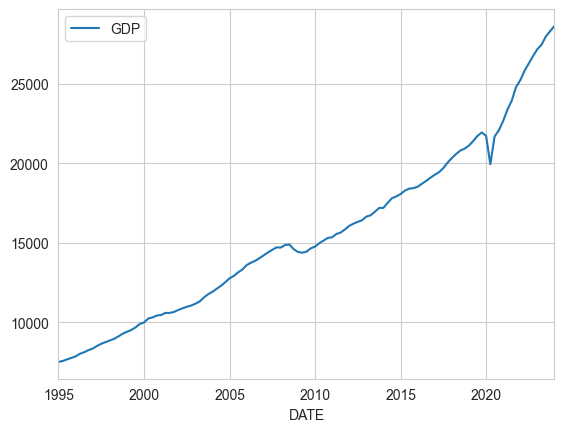

In [44]:
gdp.plot()

<Axes: xlabel='DATE'>

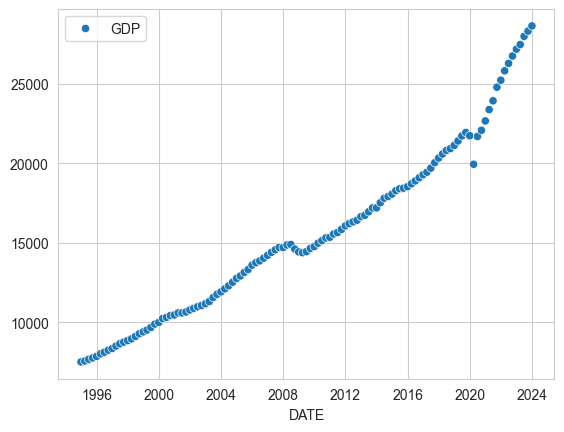

In [45]:
sns.scatterplot(data = gdp)

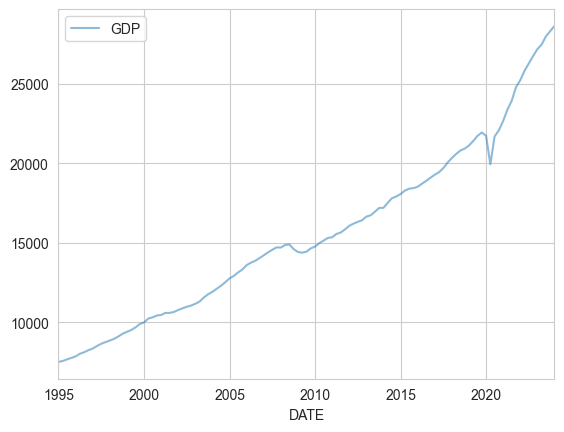

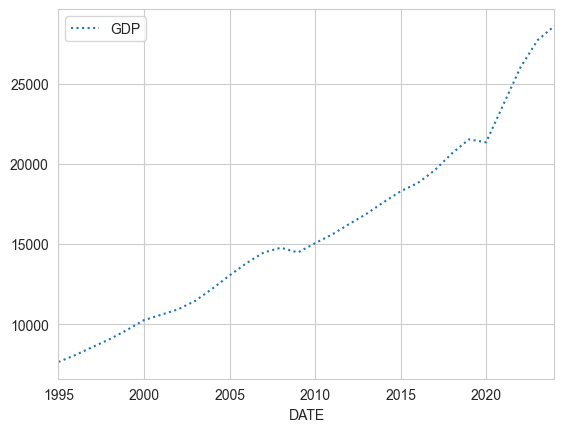

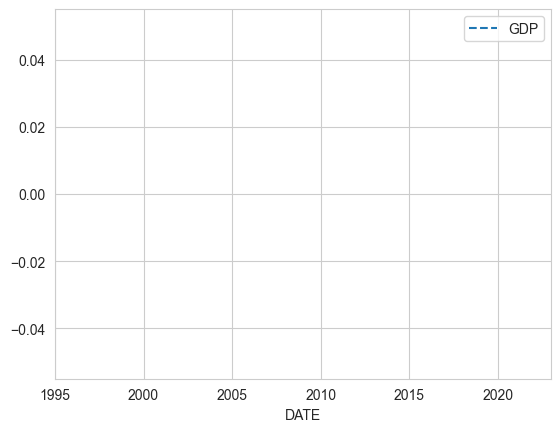

In [49]:
# try to do resampling
gdp.plot(alpha = 0.5, style = '-')
gdp.resample('BYE').mean().plot(style = ':')
# gdp.asfreq('BYE').plot(style = '--');